Importación de librerias

In [ ]:
!pip install scikit-learn
!pip install pixiedust

In [1]:
import pixiedust

Pixiedust database opened successfully


In [3]:
#import pandas #para trabajar con bases de datos y estadísticas básicas en forma de matrices que acepta números y strings
import pandas as pd
#import numpy #ayuda a operaciones con datos en forma vectorial, solo admite números
import numpy as np
#import matplotlib #herramienta para graficar
import matplotlib.pyplot as plt
#import seaborn #herramienta para graficas
import seaborn as sb

Carga de archivo

In [9]:
# use pandas to import csv file
df = pd.read_csv('https://raw.githubusercontent.com/jmcs-20/Diplomado/main/CHURN_2.csv')

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Cuenta_Corriente,Multiple_CC,Forma_Pago,OnlineSecurity,...,DeviceProtection,TechSupport,Atencion_Telf,Atencion_personal,Contract,Correspondencia,MonthlyCharges,TotalCharges,Churn,Letra
0,5575-GNVDE,Male,0,No,No,34,Yes,No,P2C,Yes,...,Yes,No,No,No,One year,No,56.95,1889.5,No,B
1,7795-CFOCW,Male,0,No,No,45,No,No,P2C,Yes,...,Yes,Yes,No,No,One year,No,42.30,1840.75,No,D
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,P2P,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,99.65,820.5,Yes,B
3,6713-OKOMC,Female,0,No,No,10,No,No,P2C,Yes,...,No,No,No,No,Month-to-month,No,29.75,301.9,No,D
4,6388-TABGU,Male,0,No,Yes,62,Yes,No,P2C,Yes,...,No,No,No,No,One year,No,56.15,3487.95,No,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,9767-FFLEM,Male,0,No,No,38,Yes,No,P2P,No,...,No,No,No,No,Month-to-month,Yes,69.50,2625.25,No,B
3517,8456-QDAVC,Male,0,No,No,19,Yes,No,P2P,No,...,No,No,Yes,No,Month-to-month,Yes,78.70,1495.1,No,D
3518,2569-WGERO,Female,0,No,No,72,Yes,No,WIRE,No,...,No,No,No,No,Two year,Yes,21.15,1419.4,No,B
3519,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,P2P,No,...,Yes,No,Yes,Yes,One year,Yes,103.20,7362.9,No,D


Verificamos la información del conjunto de datos usando el método info()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         3521 non-null   object 
 1   gender             3521 non-null   object 
 2   SeniorCitizen      3521 non-null   int64  
 3   Partner            3521 non-null   object 
 4   Dependents         3521 non-null   object 
 5   tenure             3521 non-null   int64  
 6   Cuenta_Corriente   3521 non-null   object 
 7   Multiple_CC        3521 non-null   object 
 8   Forma_Pago         3521 non-null   object 
 9   OnlineSecurity     3521 non-null   object 
 10  OnlineBackup       3521 non-null   object 
 11  DeviceProtection   3521 non-null   object 
 12  TechSupport        3521 non-null   object 
 13  Atencion_Telf      3521 non-null   object 
 14  Atencion_personal  3521 non-null   object 
 15  Contract           3521 non-null   object 
 16  Correspondencia    3521 

Revisamos la descripción del conjunto de datos, aquí solo veremos las funcionalidades de num variables.

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,3521.000000,3521.000000,3521.000000
mean,0.168134,32.638171,64.750994
std,0.374038,24.726521,30.135006
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.150000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.950000
max,1.000000,72.000000,118.650000


Ahora eliminamos las características no deseadas de nuestro conjunto de datos porque estas características no deseadas soncomo la basura y afectarán la precisión de nuestro modelo, por lo que las eliminamos.

In [14]:
# we didn't require customerID so we drop it
df = df.drop('customerID',axis=1)

In [16]:
#count of string value into the column.
count=0
for i in df.TotalCharges:
    if i==' ':
        count+=1
print('count of empty string:- ',count)
#we will replace this empty string to nan values
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
# typecasting of the TotalCharges column
df['TotalCharges'] = df['TotalCharges'].astype(float)

count of empty string:-  2


In [17]:
# checking null value
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
Cuenta_Corriente     0
Multiple_CC          0
Forma_Pago           0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
Atencion_Telf        0
Atencion_personal    0
Contract             0
Correspondencia      0
MonthlyCharges       0
TotalCharges         2
Churn                0
Letra                0
dtype: int64

In [18]:
# fill null values with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [19]:
#numerical variables
num = list(df.select_dtypes(include=['int64','float64']).keys())#categorical variables
cat = list(df.select_dtypes(include='O').keys())
print(cat)
print(num)

['gender', 'Partner', 'Dependents', 'Cuenta_Corriente', 'Multiple_CC', 'Forma_Pago', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Atencion_Telf', 'Atencion_personal', 'Contract', 'Correspondencia', 'Churn', 'Letra']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [22]:
# value_counts of the categorical columns
for i in cat:
    print(df[i].value_counts())

Female    1778
Male      1743
Name: gender, dtype: int64
No     1801
Yes    1720
Name: Partner, dtype: int64
No     2523
Yes     998
Name: Dependents, dtype: int64
Yes    3174
No      347
Name: Cuenta_Corriente, dtype: int64
No     2002
Yes    1519
Name: Multiple_CC, dtype: int64
P2P     1552
P2C     1201
WIRE     768
Name: Forma_Pago, dtype: int64
No     2534
Yes     987
Name: OnlineSecurity, dtype: int64
No     2288
Yes    1233
Name: OnlineBackup, dtype: int64
No     2331
Yes    1190
Name: DeviceProtection, dtype: int64
No     2491
Yes    1030
Name: TechSupport, dtype: int64
No     2171
Yes    1350
Name: Atencion_Telf, dtype: int64
No     2148
Yes    1373
Name: Atencion_personal, dtype: int64
Month-to-month    1947
Two year           866
One year           708
Name: Contract, dtype: int64
Yes    2122
No     1399
Name: Correspondencia, dtype: int64
No     2606
Yes     915
Name: Churn, dtype: int64
B    1761
D    1760
Name: Letra, dtype: int64


In [24]:
# we have to handel this all categorical variables
# there are mainly Yes/No features in most of the columns
# we will convert Yes = 1 and No = 0
for i in cat:
    df[i] = df[i].replace('Yes',1)
    df[i] = df[i].replace('No',0)

In [25]:
# we will convert male = 1 and female = 0
df.gender = df.gender.replace('Male',1)
df.gender = df.gender.replace('Female',0)

In [27]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Cuenta_Corriente'] = label.fit_transform(df['Cuenta_Corriente'])
df['Contract'] = label.fit_transform(df['Contract'])

In [28]:
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
# now we scling all the data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[scale_cols] = scale.fit_transform(df[scale_cols])

In [50]:
df = df.drop(['Forma_Pago','Letra'],axis=1)

In [51]:
# independent and dependent variables
x = df.drop('Churn',axis=1)
y = df['Churn']

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)
print(xtrain.shape)
print(xtest.shape)

(2816, 17)
(705, 17)


In [53]:
# import tensorflow
import tensorflow as tf
#import keras
from tensorflow import keras

In [57]:
# define sequential model
model = keras.Sequential([
    # input layer
    keras.layers.Dense(17, input_shape=(17,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [58]:
# time for compilation of neural net.
model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

In [59]:
# now we fit our model to training data
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
88/88 [==============================] - 1s 3ms/step - loss: 0.5541 - accuracy: 0.7301
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4848 - accuracy: 0.7379
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.7763
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.7827
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.7887
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.7926
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.7997
Epoch 8/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8008
Epoch 9/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8004
Epoch 10/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8022
Epoch 11/

88/88 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8438
Epoch 83/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8462
Epoch 84/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8469
Epoch 85/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3421 - accuracy: 0.8484
Epoch 86/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3443 - accuracy: 0.8455
Epoch 87/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3407 - accuracy: 0.8427
Epoch 88/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8494
Epoch 89/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3393 - accuracy: 0.8484
Epoch 90/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.8469
Epoch 91/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.8462
Epoch 92/100


In [60]:
# evalute the model
model.evaluate(xtest,ytest)

23/23 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.7901


[0.4692971110343933, 0.7900709509849548]

In [61]:
# predict the churn values
ypred = model.predict(xtest)
print(ypred)
# unscaling the ypred values
ypred_lis = []
for i in ypred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

[[8.57690275e-02]
 [2.04478800e-02]
 [3.06365192e-02]
 [1.70178413e-02]
 [5.23638070e-01]
 [2.25148499e-02]
 [7.72262812e-02]
 [4.12262142e-01]
 [9.48394120e-01]
 [5.29022515e-02]
 [8.31068277e-01]
 [1.22813404e-01]
 [6.09152615e-01]
 [5.72018564e-01]
 [8.18118453e-03]
 [1.35728419e-02]
 [2.41224170e-02]
 [5.98098576e-01]
 [2.33043879e-01]
 [8.32489133e-03]
 [1.03604913e-01]
 [6.70606971e-01]
 [2.41747320e-01]
 [2.45317042e-01]
 [2.18834698e-01]
 [3.33741903e-02]
 [1.95872784e-03]
 [1.50756240e-02]
 [7.19575047e-01]
 [7.15011597e-01]
 [2.31654555e-01]
 [7.84073353e-01]
 [4.34549153e-02]
 [7.72279084e-01]
 [4.10615504e-01]
 [7.90014863e-03]
 [1.09889656e-01]
 [8.37099850e-01]
 [4.71371174e-01]
 [2.56791115e-02]
 [3.02979946e-02]
 [5.80187738e-02]
 [2.50453353e-02]
 [8.18541050e-01]
 [9.79826689e-01]
 [1.65846050e-02]
 [9.80299711e-03]
 [8.12100887e-01]
 [2.72500098e-01]
 [2.10142285e-01]
 [3.62429917e-02]
 [6.86691403e-02]
 [1.75648004e-01]
 [7.28228688e-03]
 [2.20274627e-02]
 [3.753626

In [62]:
#make dataframe for comparing the orignal and predict values
data = {'orignal_churn':ytest, 'predicted_churn':ypred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
2920,1,0
2355,0,0
1825,0,0
3376,0,0
176,1,1
2371,0,0
3342,0,0
2046,0,0
865,1,1
1112,0,0


              precision    recall  f1-score   support

           0       0.87      0.85      0.86       540
           1       0.55      0.59      0.57       165

    accuracy                           0.79       705
   macro avg       0.71      0.72      0.71       705
weighted avg       0.80      0.79      0.79       705



Text(132.0, 0.5, 'True_number')

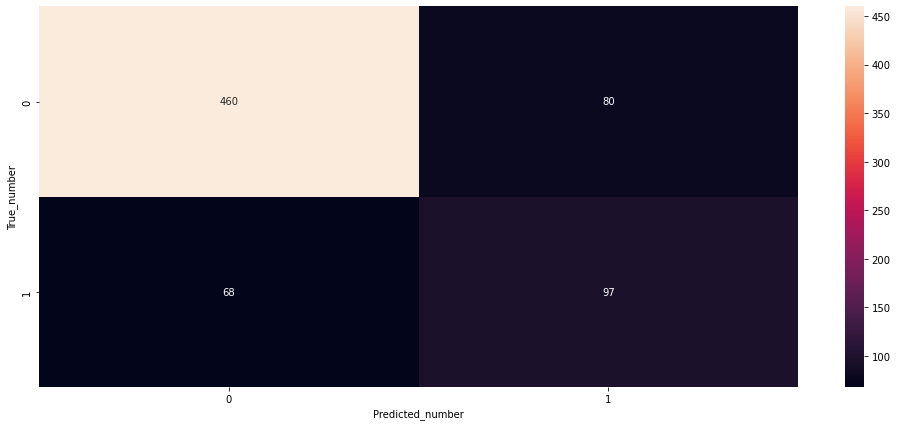

In [63]:
# checking for performance metrices
#importing classification_report and confusion metrics
from sklearn.metrics import confusion_matrix, classification_report
#print classification_report
print(classification_report(ytest,ypred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=ytest,predictions=ypred_lis)
plt.figure(figsize = (17,7))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')